In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [5]:
df_data = pd.read_csv('vgames2.csv')
df_data.head(11)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


> **EDA: sales 컬럼들의 K와 M을 수치로 변환**




In [7]:
# sales 컬럼들의 K와 M을 수치로 변환 (나중에 함수로 시도해보기)

# NA_Sales 컬럼의 K를 수치로 변환
NA_K = df_data[df_data['NA_Sales'].str.contains('K')]
NA_K_index = NA_K.index
df_NA_K = df_data.drop(NA_K_index).reset_index()
NA_K['NA_Sales'] = NA_K['NA_Sales'].str.replace('K', '')
NA_K['NA_Sales'] = NA_K['NA_Sales'].astype('float')
NA_K['NA_Sales'] = NA_K['NA_Sales']/1000
df_data = pd.concat([df_NA_K, NA_K])
df_data = df_data.sort_values(by=["Unnamed: 0"]).reset_index()
df_data = df_data.iloc[:,2:]
# NA_Sales 컬럼의 M 삭제
NA_M = df_data[df_data['NA_Sales'].str.contains('M', na=False)]
NA_M_index = NA_M.index
df_NA_M = df_data.drop(NA_M_index).reset_index()
NA_M['NA_Sales'] = NA_M['NA_Sales'].str.replace('M', '')
NA_M['NA_Sales'] = NA_M['NA_Sales'].astype('float')
df_data = pd.concat([df_NA_M, NA_M])
df_data = df_data.sort_values(by=["Unnamed: 0"]).reset_index()
df_data = df_data.iloc[:,2:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [8]:
# EU_Sales 컬럼의 K를 수치로 변환
EU_K = df_data[df_data['EU_Sales'].str.contains('K')]
EU_K_index = EU_K.index
df_EU_K = df_data.drop(EU_K_index).reset_index()
EU_K['EU_Sales'] = EU_K['EU_Sales'].str.replace('K', '')
EU_K['EU_Sales'] = EU_K['EU_Sales'].astype('float')
EU_K['EU_Sales'] = EU_K['EU_Sales']/1000
df_data = pd.concat([df_EU_K, EU_K])
df_data = df_data.sort_values(by=["Unnamed: 0"]).reset_index()
df_data = df_data.iloc[:,2:]
# EU_Sales 컬럼의 M 삭제
EU_M = df_data[df_data['EU_Sales'].str.contains('M', na=False)]
EU_M_index = EU_M.index
df_EU_M = df_data.drop(EU_M_index).reset_index()
EU_M['EU_Sales'] = EU_M['EU_Sales'].str.replace('M', '')
EU_M['EU_Sales'] = EU_M['EU_Sales'].astype('float')
df_data = pd.concat([df_EU_M, EU_M])
df_data = df_data.sort_values(by=["Unnamed: 0"]).reset_index()
df_data = df_data.iloc[:,2:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [9]:
# JP_Sales 컬럼의 K를 수치로 변환
JP_K = df_data[df_data['JP_Sales'].str.contains('K')]
JP_K_index = JP_K.index
df_JP_K = df_data.drop(JP_K_index).reset_index()
JP_K['JP_Sales'] = JP_K['JP_Sales'].str.replace('K', '')
JP_K['JP_Sales'] = JP_K['JP_Sales'].astype('float')
JP_K['JP_Sales'] = JP_K['JP_Sales']/1000
df_data = pd.concat([df_JP_K, JP_K])
df_data = df_data.sort_values(by=["Unnamed: 0"]).reset_index()
df_data = df_data.iloc[:,2:]
# JP_Sales 컬럼의 M 삭제
JP_M = df_data[df_data['JP_Sales'].str.contains('M', na=False)]
JP_M_index = JP_M.index
df_JP_M = df_data.drop(JP_M_index).reset_index()
JP_M['JP_Sales'] = JP_M['JP_Sales'].str.replace('M', '')
JP_M['JP_Sales'] = JP_M['JP_Sales'].astype('float')
df_data = pd.concat([df_JP_M, JP_M])
df_data = df_data.sort_values(by=["Unnamed: 0"]).reset_index()
df_data = df_data.iloc[:,2:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [10]:
# Other_Sales 컬럼의 K를 수치로 변환
Other_K = df_data[df_data['Other_Sales'].str.contains('K')]
Other_K_index = Other_K.index
df_Other_K = df_data.drop(Other_K_index).reset_index()
Other_K['Other_Sales'] = Other_K['Other_Sales'].str.replace('K', '')
Other_K['Other_Sales'] = Other_K['Other_Sales'].astype('float')
Other_K['Other_Sales'] = Other_K['Other_Sales']/1000
df_data = pd.concat([df_Other_K, Other_K])
df_data = df_data.sort_values(by=["Unnamed: 0"]).reset_index()
df_data = df_data.iloc[:,2:]
# Other_Sales 컬럼의 M 삭제
Other_M = df_data[df_data['Other_Sales'].str.contains('M', na=False)]
Other_M_index = Other_M.index
df_Other_M = df_data.drop(Other_M_index).reset_index()
Other_M['Other_Sales'] = Other_M['Other_Sales'].str.replace('M', '')
Other_M['Other_Sales'] = Other_M['Other_Sales'].astype('float')
df_data = pd.concat([df_Other_M, Other_M])
df_data = df_data.sort_values(by=["Unnamed: 0"]).reset_index()
df_data = df_data.iloc[:,2:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [11]:
df_data.head(11)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [12]:
df_copy = df_data.copy()
df_copy

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


> **EDA: 결측치 처리**

In [13]:
df_copy.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [14]:
# 결측치 제거 (0.023% 이므로 그냥 제거)
df_copy = df_copy.dropna().reset_index()
df_copy = df_copy.iloc[:,1:]
df_copy

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16236,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


> **EDA: 이상치 제거 (year 컬럼)**

In [15]:
# year 컬럼에서 100년보다 아래인 값 제거
df_year_error = df_copy[df_copy['Year']<=1000].index
df_copy = df_copy.drop(df_year_error).reset_index()
df_copy = df_copy.iloc[:,1:]
df_copy

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16136,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16137,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16138,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16139,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


> **EDA: 타입 변경 (Unnamed: 0을 object로, Sales를 float로 변경)**

In [16]:
# 타입 변경
df_copy['Unnamed: 0'] = df_copy['Unnamed: 0'].astype('object')
df_copy.iloc[:,6:] = df_copy.iloc[:,6:].astype('float')

In [17]:
df_copy['Year'] = df_copy['Year'].astype('int')

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16141 entries, 0 to 16140
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16141 non-null  object 
 1   Name         16141 non-null  object 
 2   Platform     16141 non-null  object 
 3   Year         16141 non-null  int64  
 4   Genre        16141 non-null  object 
 5   Publisher    16141 non-null  object 
 6   NA_Sales     16141 non-null  float64
 7   EU_Sales     16141 non-null  float64
 8   JP_Sales     16141 non-null  float64
 9   Other_Sales  16141 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.2+ MB


In [19]:
# 데이터 정제 후 최종 데이터프레임 df
df = df_copy.copy()
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16136,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16137,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16138,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16139,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


> **분석1. 지역별 선호하는 장르**

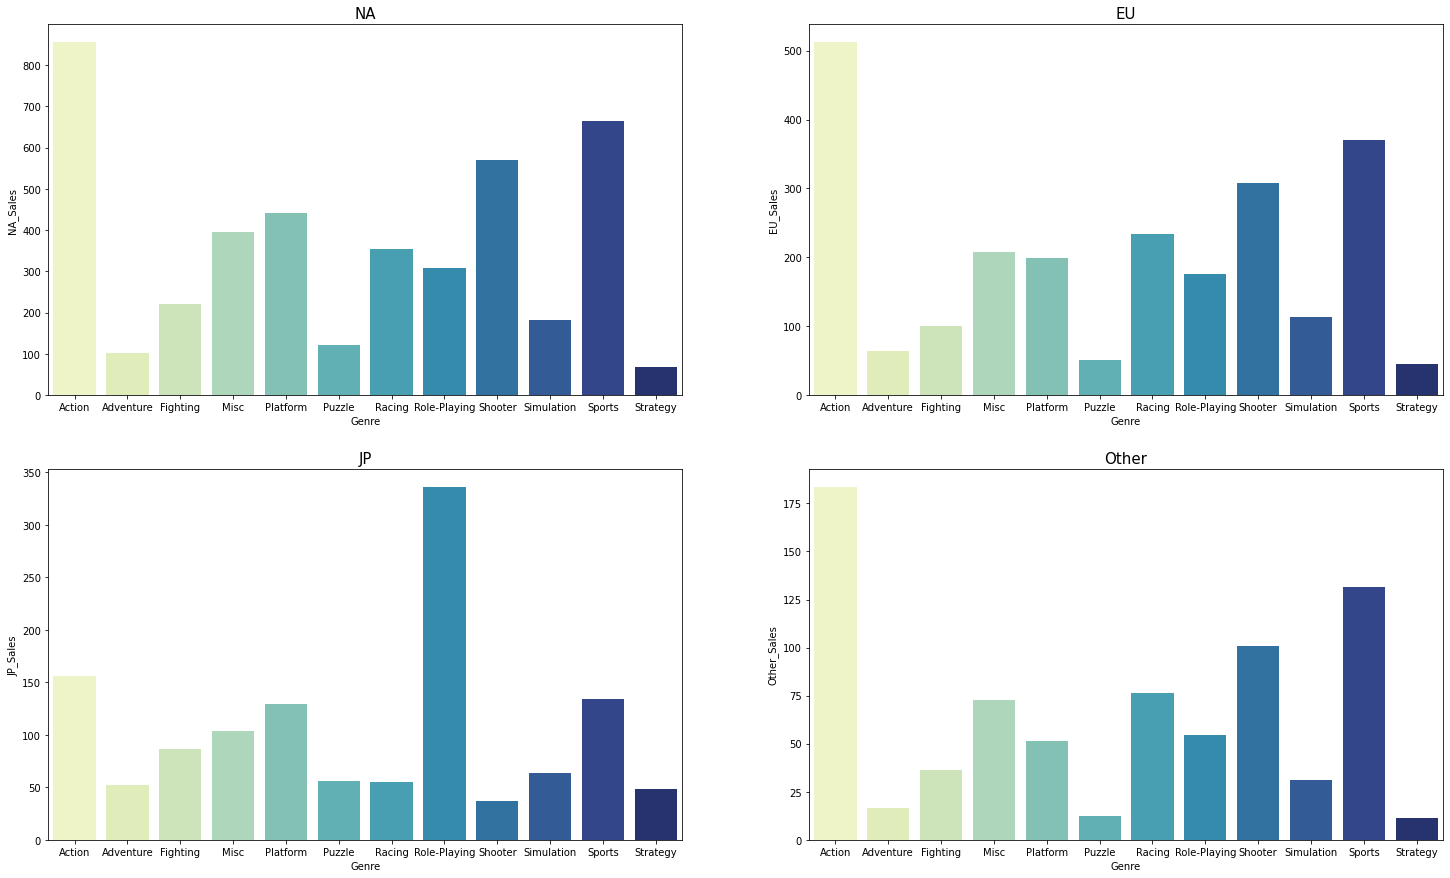

In [20]:
# 지역별 선호하는 장르 (판매량 기준)

df_Genre = df.groupby(['Genre']).sum().reset_index() # 장르별 판매량

fig = plt.figure(figsize=(25,15))

area01 = fig.add_subplot(2,2,1)
area02 = fig.add_subplot(2,2,2)
area03 = fig.add_subplot(2,2,3)
area04 = fig.add_subplot(2,2,4)

area01.set_title('NA', fontsize=15)
area02.set_title('EU', fontsize=15)
area03.set_title('JP', fontsize=15)
area04.set_title('Other', fontsize=15)

sns.barplot(data=df_Genre, x='Genre', y='NA_Sales', ci=None, palette='YlGnBu', ax=area01)
sns.barplot(data=df_Genre, x='Genre', y='EU_Sales', ci=None, palette='YlGnBu',ax=area02)
sns.barplot(data=df_Genre, x='Genre', y='JP_Sales', ci=None, palette='YlGnBu',ax=area03)
sns.barplot(data=df_Genre, x='Genre', y='Other_Sales', ci=None, palette='YlGnBu',ax=area04)

plt.savefig('01.png', dpi=300)
plt.show();

In [21]:
# 장르별 게임 수 (단지 게임 수가 많아서 장르 판매량이 많은 것인지 확인)
df['Genre'].value_counts().reset_index()

,index,Genre
0,Action,3226
1,Sports,2289
2,Misc,1671
3,Role-Playing,1457
4,Shooter,1268
5,Adventure,1264
6,Racing,1209
7,Platform,865
8,Simulation,841
9,Fighting,829


In [22]:
# 지역별 시장 점유율
sum_na = df.NA_Sales.sum()
sum_eu = df.EU_Sales.sum()
sum_jp = df.JP_Sales.sum()
sum_other = df.Other_Sales.sum()
sum_na, sum_eu, sum_jp, sum_other

(4279.88, 2377.87, 1258.21, 778.39)

In [23]:
sum = pd.DataFrame({'NA' :[4279.88], 'EU' :[2377.87], 'JP' :[1258.21], 'Other' :[778.39]})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


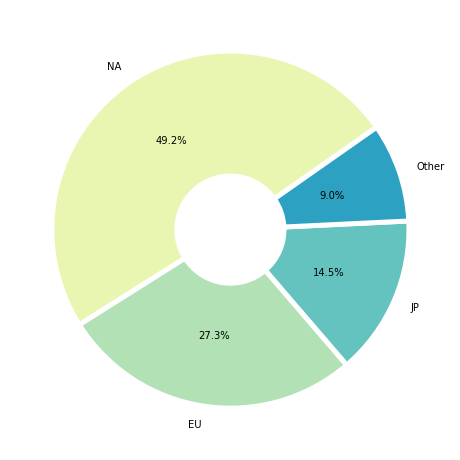

In [24]:
labels = ['NA', 'EU', 'JP', 'Other']
plt.figure(figsize=(8,9))
plt.pie(sum, labels=labels,  autopct='%.1f%%', 
       colors = sns.color_palette('YlGnBu'), startangle=35,
       wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.savefig('region.png', dpi=500)
plt.show()

>**분석2. 출고량이 높은 게임에 대한 분석**

In [25]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16141.000000,16141.000000,16141.000000,16141.000000,16141.000000
mean,2006.406356,0.265156,0.147319,0.077951,0.048224
std,5.830780,0.822621,0.508480,0.306771,0.189939
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


> **분석2-1. 각 지역별 상위 25% 게임**


In [26]:
# 상위 25% (4000개)
High = df[(df['NA_Sales']>=0.33) | (df['EU_Sales']>=0.33) | (df['JP_Sales']>=0.33) | (df['Other_Sales']>=0.33)]
High

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,11,Ford Racing,PS,2001,Racing,Empire Interactive,0.48,0.33,0.00,0.06
20,21,Ty the Tasmanian Tiger,PS2,2002,Platform,Electronic Arts,0.57,0.45,0.00,0.15
24,25,Injustice: Gods Among Us,PS3,2013,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23
41,43,Phoenix Wright: Ace Attorney - Trials and Trib...,DS,2007,Adventure,Capcom,0.33,0.05,0.25,0.04
43,45,Crysis 3,X360,2013,Shooter,Electronic Arts,0.51,0.33,0.01,0.08
...,...,...,...,...,...,...,...,...,...,...
16117,16574,Finding Nemo,PS2,2003,Action,THQ,1.26,0.60,0.05,0.18
16119,16576,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08
16127,16584,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13
16134,16592,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08


In [27]:
# 상위 25% / 지역별 선호하는 장르 (판매량 기준)

NA_high = df[df['NA_Sales']>=0.33]
NA_high_Genre = NA_high.groupby(['Genre'])['NA_Sales'].sum().reset_index()

EU_high = df[df['EU_Sales']>=0.33]
EU_high_Genre = EU_high.groupby(['Genre'])['EU_Sales'].sum().reset_index()

JP_high = df[df['JP_Sales']>=0.33]
JP_high_Genre = JP_high.groupby(['Genre'])['JP_Sales'].sum().reset_index()

Other_high = df[df['Other_Sales']>=0.33]
Other_high_Genre = Other_high.groupby(['Genre'])['Other_Sales'].sum().reset_index()

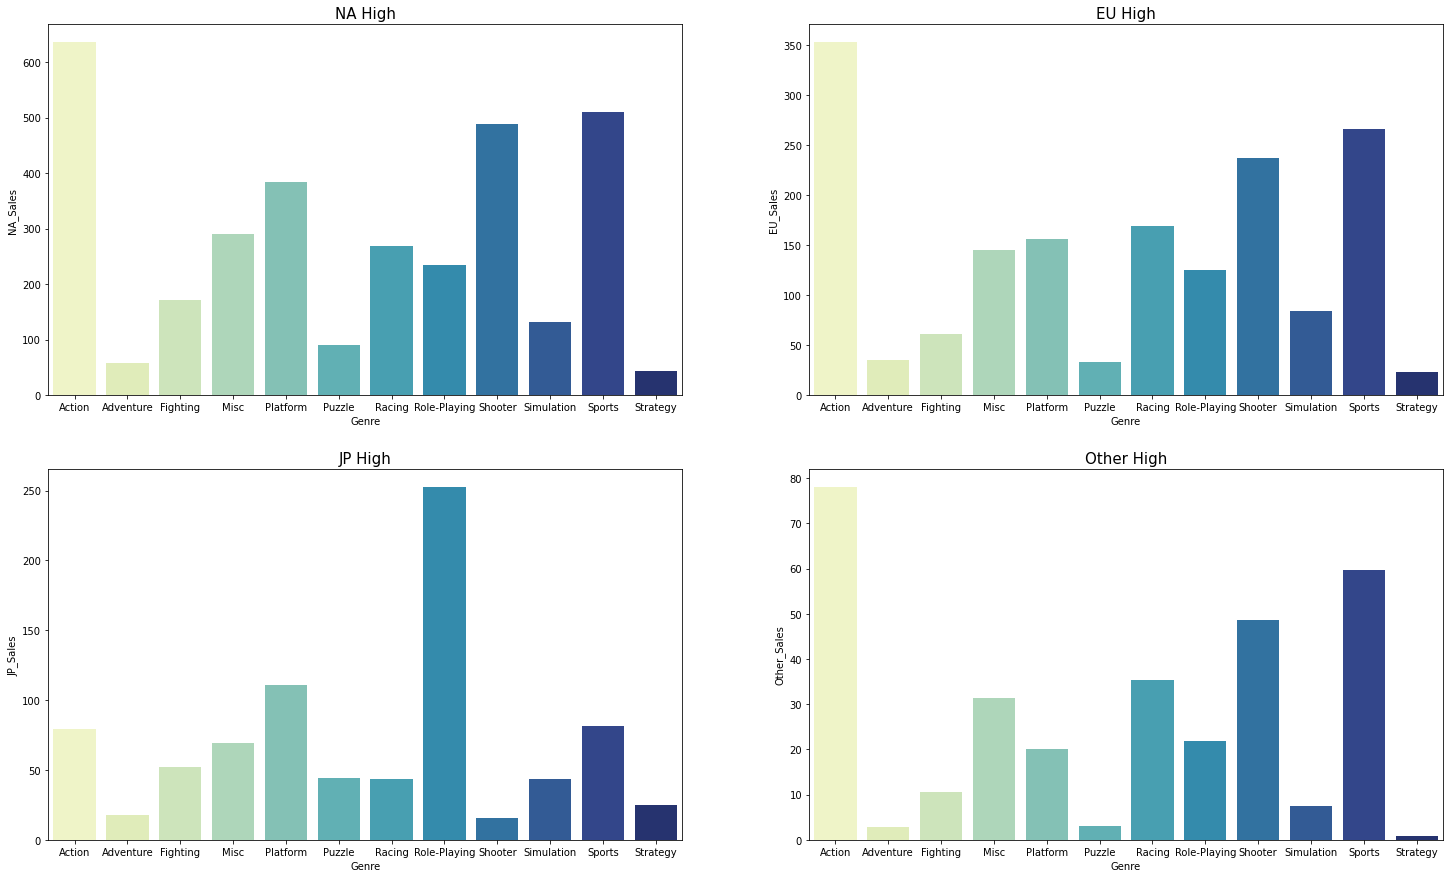

In [28]:
fig = plt.figure(figsize=(25,15))

area01 = fig.add_subplot(2,2,1)
area02 = fig.add_subplot(2,2,2)
area03 = fig.add_subplot(2,2,3)
area04 = fig.add_subplot(2,2,4)

area01.set_title('NA High', fontsize=15)
area02.set_title('EU High', fontsize=15)
area03.set_title('JP High', fontsize=15)
area04.set_title('Other High', fontsize=15)

sns.barplot(data=NA_high_Genre, x='Genre', y='NA_Sales', ci=None, palette='YlGnBu', ax=area01)
sns.barplot(data=EU_high_Genre, x='Genre', y='EU_Sales', ci=None, palette='YlGnBu',ax=area02)
sns.barplot(data=JP_high_Genre, x='Genre', y='JP_Sales', ci=None, palette='YlGnBu',ax=area03)
sns.barplot(data=Other_high_Genre, x='Genre', y='Other_Sales', ci=None, palette='YlGnBu',ax=area04)

plt.savefig('High.png', dpi=500)
plt.show();

> **분석2-2. 상위 25% 게임**

In [29]:
# 출고량을 모두 더한 Sales 컬럼 형성
df_one_sales = df.copy()
df_one_sales['Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df_one_sales

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16136,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16137,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16138,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16139,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [30]:
# 출고량 상위 25% = 판매량 0.5이상 (4000개/16000개)
high = df_one_sales[df_one_sales['Sales']>=0.5]
high

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
10,11,Ford Racing,PS,2001,Racing,Empire Interactive,0.48,0.33,0.00,0.06,0.87
20,21,Ty the Tasmanian Tiger,PS2,2002,Platform,Electronic Arts,0.57,0.45,0.00,0.15,1.17
24,25,Injustice: Gods Among Us,PS3,2013,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23,1.25
33,35,Mega Man Anniversary Collection,PS2,2004,Platform,Capcom,0.29,0.22,0.00,0.08,0.59
39,41,Vagrant Story,PS,2000,Role-Playing,Crave Entertainment,0.30,0.20,0.30,0.06,0.86
...,...,...,...,...,...,...,...,...,...,...,...
16119,16576,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
16122,16579,Gex: Enter the Gecko,PS,1998,Platform,BMG Interactive Entertainment,0.32,0.22,0.00,0.04,0.58
16127,16584,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13,1.43
16134,16592,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53


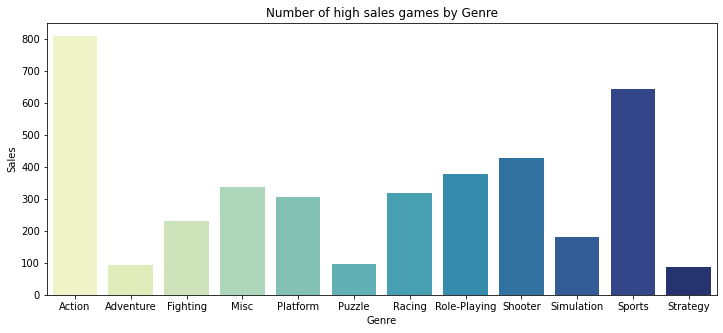

In [31]:
# 상위 25% / 장르 선호도1 (갯수 기준)

high_Genre = high.groupby(['Genre'])['Sales'].size().reset_index()

plt.figure(figsize=(12,5))
plt.title('Number of high sales games by Genre')
sns.barplot(data=high_Genre, x='Genre', y='Sales', ci=None, palette='YlGnBu')
plt.savefig('count4.png', dpi=500)
plt.show();

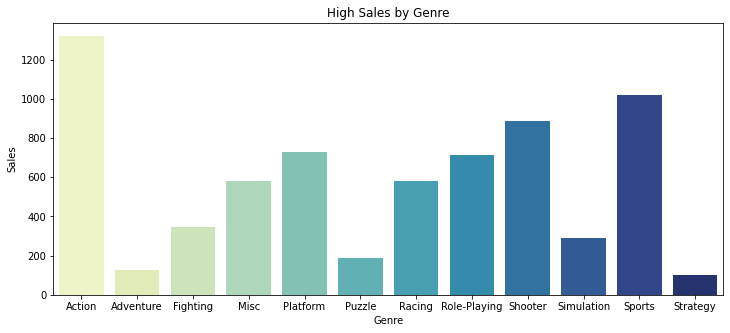

In [32]:
# 상위 25% / 장르 선호도2 (판매량 기준)

high_Genre = high.groupby(['Genre'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.title('High Sales by Genre')
sns.barplot(data=high_Genre, x='Genre', y='Sales', ci=None, palette='YlGnBu')
plt.savefig('03.png', dpi=500)
plt.show();

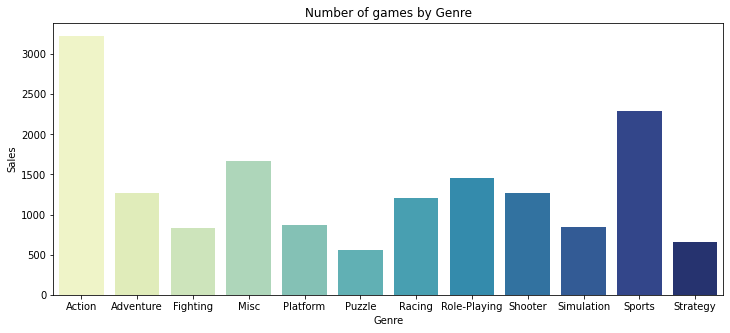

In [33]:
# 장르 선호도1 (갯수 기준)

df_genre = df_one_sales.groupby(['Genre'])['Sales'].size().reset_index()

plt.figure(figsize=(12,5))
plt.title('Number of games by Genre')
sns.barplot(data=df_genre, x='Genre', y='Sales', ci=None, palette='YlGnBu')
plt.savefig('count3.png', dpi=500)
plt.show();

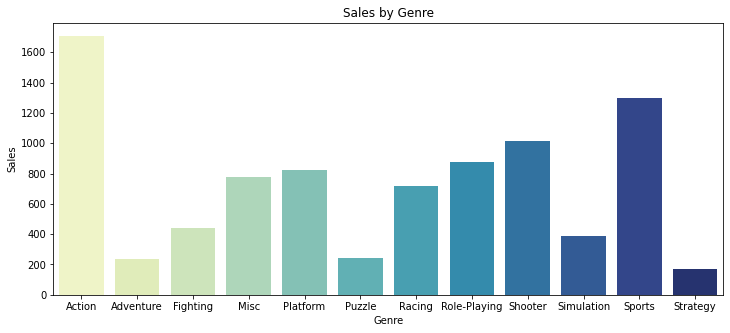

In [34]:
# 장르 선호도2 (판매량 기준)

df_genre = df_one_sales.groupby(['Genre'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.title('Sales by Genre')
sns.barplot(data=df_genre, x='Genre', y='Sales', ci=None, palette='YlGnBu')
plt.savefig('02.png', dpi=500)
plt.show();

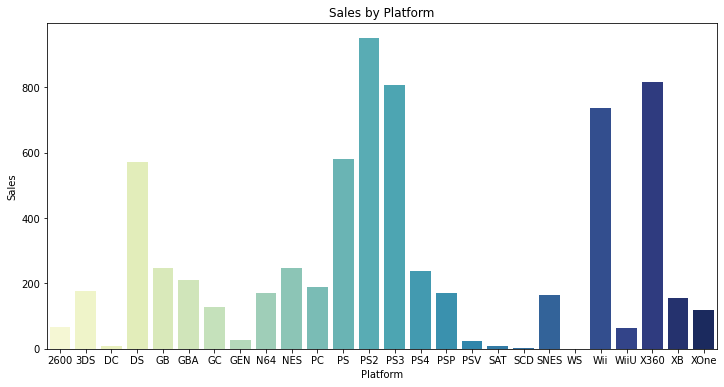

In [35]:
# 상위 25% / 플랫폼 선호도 (판매량 기준)

high_Platform = high.groupby(['Platform'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.title('Sales by Platform')
sns.barplot(data=high_Platform, x='Platform', y='Sales', ci=None, palette='YlGnBu')
plt.savefig('4.png', dpi=500)
plt.show();

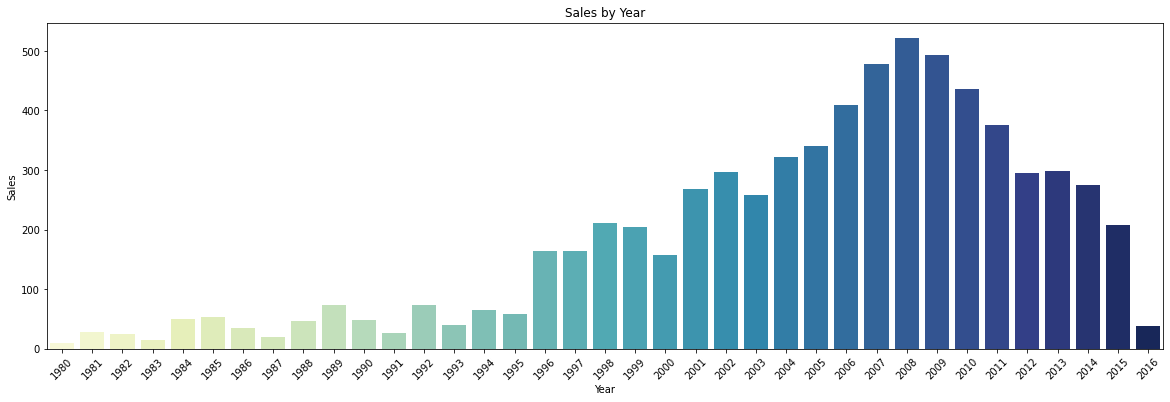

In [36]:
# 상위 25% / 출시년도

high_Year = high.groupby(['Year'])['Sales'].sum().reset_index()

plt.figure(figsize=(20,6))
plt.title('Sales by Year')
sns.barplot(data=high_Year, x='Year', y='Sales', ci=None, palette='YlGnBu')
plt.xticks(rotation=45)
plt.show();

> **분석 2-3. Top 10 게임**

In [68]:
top = df_one_sales[df_one_sales['Sales']>=25]
top

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,year
1180,1204,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1980s
2838,2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000s
2942,3015,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,2000s
3268,3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000s
4088,4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980s
6756,6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2000s
7626,7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,1990s
10213,10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1980s
12237,12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,2000s
16076,16532,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,2000s


> **분석3. 연도별 게임의 트렌드**

In [38]:
# 10년대별로 분리하여 컬럼에 저장

bins = [1980, 1989, 1999, 2009, 2020]
labels = ['1980s', '1990s', '2000s', '2010s']
df_one_sales['year'] = pd.cut(x=df_one_sales['Year'], bins=bins, labels=labels)
df_one_sales.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,year
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2000s
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,2000s
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,2010s
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,2010s
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,2010s


> **분석3-1. 연도별 장르 선호도 변화**

In [219]:
ei = df_one_sales[df_one_sales['year']=='1980s']
eig = ei.groupby(['Genre'])['Sales'].sum().sort_values().reset_index()
ni = df_one_sales[df_one_sales['year']=='1990s']
nin = ni.groupby(['Genre'])['Sales'].sum().sort_values().reset_index()
th = df_one_sales[df_one_sales['year']=='2000s']
tho = th.groupby(['Genre'])['Sales'].sum().sort_values().reset_index()
tw = df_one_sales[df_one_sales['year']=='2010s']
two = tw.groupby(['Genre'])['Sales'].sum().sort_values().reset_index()

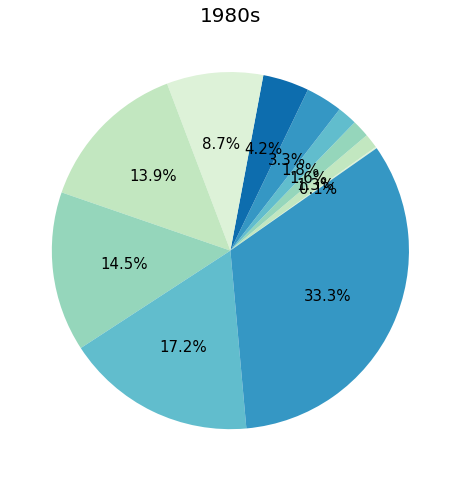

In [214]:
plt.figure(figsize=(8,9))
plt.pie(eig['Sales'], textprops={'size':15},  autopct='%.1f%%', 
       colors = sns.color_palette('GnBu'), startangle=35,)
plt.title('1980s', size=20)
# plt.savefig('01.png', dpi=500)
plt.show()

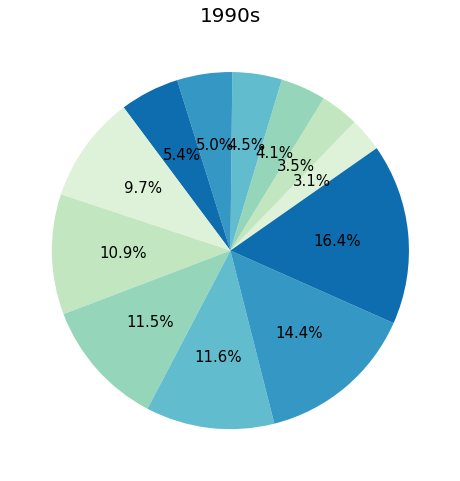

In [215]:
plt.figure(figsize=(8,9))
plt.pie(nin['Sales'], textprops={'size':15}, autopct='%.1f%%', 
       colors = sns.color_palette('GnBu'), startangle=35,)
plt.title('1990s', size=20)
# plt.savefig('02.png', dpi=500)
plt.show()

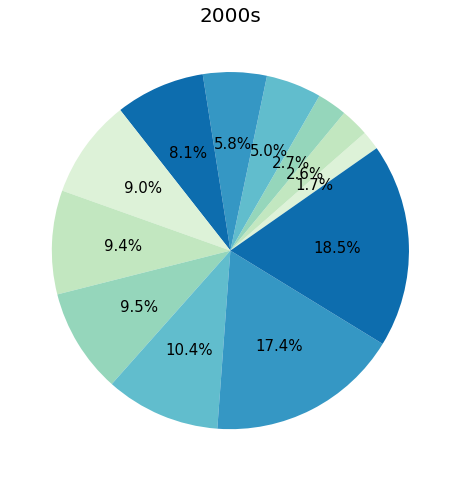

In [216]:
plt.figure(figsize=(8,9))
plt.pie(tho['Sales'], textprops={'size':15},autopct='%.1f%%', 
       colors = sns.color_palette('GnBu'), startangle=35,)
plt.title('2000s', size=20)
# plt.savefig('03.png', dpi=500)
plt.show()

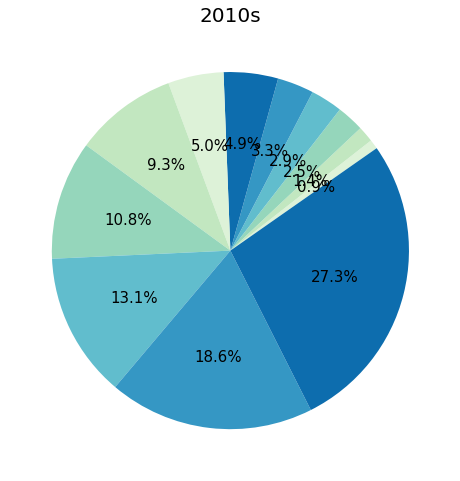

In [217]:
plt.figure(figsize=(8,9))
plt.pie(two['Sales'], textprops={'size':15}, autopct='%.1f%%', 
       colors = sns.color_palette('GnBu'), startangle=35,)
plt.title('2010s', size=20)
# plt.savefig('04.png', dpi=500)
plt.show()

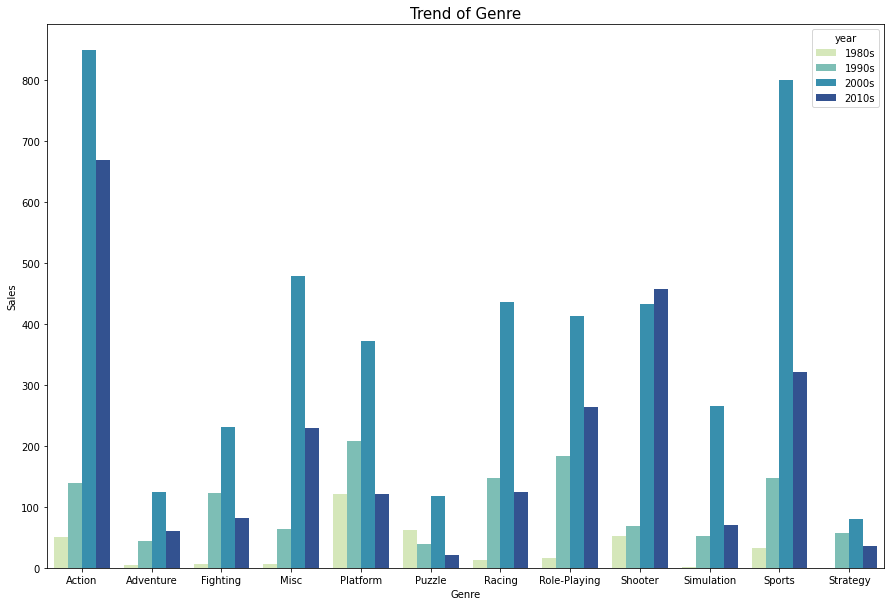

In [39]:
# 연도별 장르 선호도 변화

year = df_one_sales.groupby(['Genre', 'year'])['Sales'].sum().reset_index()

plt.figure(figsize=(15,10))
plt.title('Trend of Genre', fontsize=15)
sns.barplot(data=year, x='Genre', y='Sales', hue='year', ci=None, palette='YlGnBu')
plt.savefig('04.png', dpi=500)
plt.show();

> **분석3-2. 연도별 플랫폼 변화**

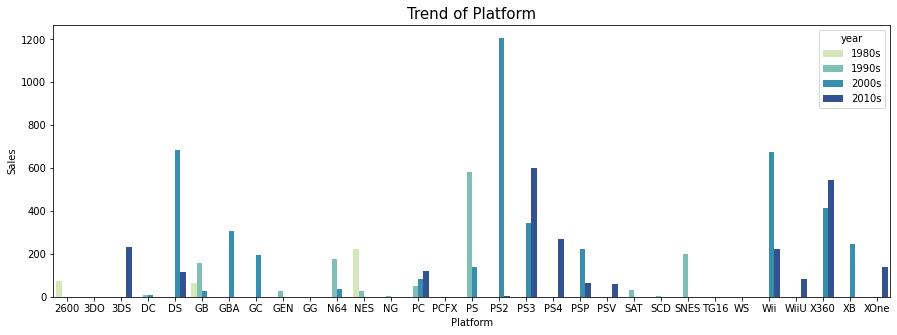

In [42]:
# 연도별 플랫폼 변화

year_platform = df_one_sales.groupby(['Platform', 'year'])['Sales'].sum().reset_index()

plt.figure(figsize=(15,5))
plt.title('Trend of Platform', fontsize=15)
sns.barplot(data=year_platform, x='Platform', y='Sales', hue='year', ci=None, palette='YlGnBu')
plt.savefig('07.png', dpi=500)
plt.show();

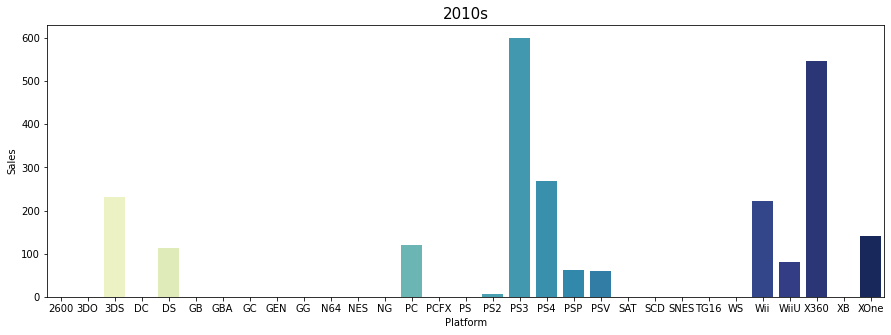

In [43]:
recent2 = year_platform[year_platform['year']=='2010s']
plt.figure(figsize=(15,5))
plt.title('2010s', fontsize=15)
sns.barplot(data=recent2, x='Platform', y='Sales', ci=None, palette='YlGnBu')
plt.savefig('A.png', dpi=500)
plt.show();

In [44]:
# 최근 10개년 플랫폼 동향
recent3 = df_one_sales[df_one_sales['year']=='2010s']
recent_sales = recent3.groupby(['Year', 'Platform'])['Sales'].sum().reset_index()
recent_sales

,Year,Platform,Sales
0,2010,DS,72.52
1,2010,PC,24.09
2,2010,PS2,5.12
3,2010,PS3,144.38
4,2010,PSP,32.97
...,...,...,...
63,2016,X360,0.83
64,2016,XOne,12.38
65,2017,PS4,0.03
66,2017,PSV,0.02


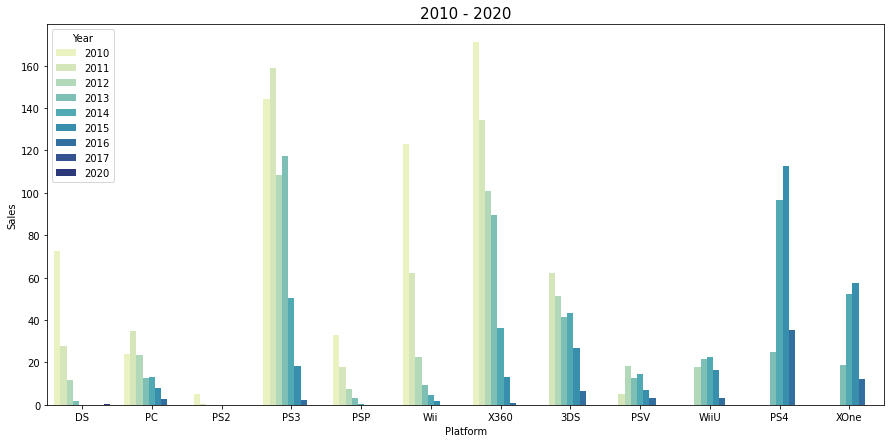

In [45]:
plt.figure(figsize=(15,7))
plt.title('2010 - 2020', fontsize=15)
sns.barplot(data=recent_sales, x='Platform', y='Sales', hue='Year', ci=None, palette='YlGnBu')
plt.show();

> **분석4. 플랫폼별 차이**

> **분석4-1. 플랫폼별 출고량**

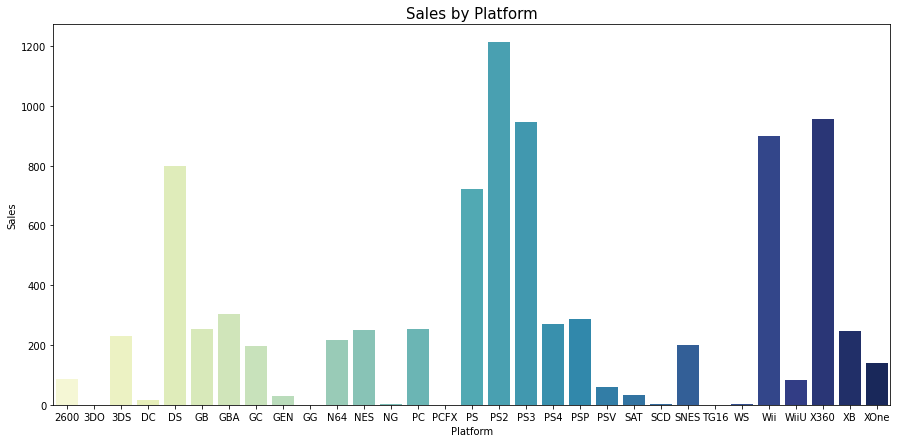

In [46]:
platform = df_one_sales.groupby(['Platform'])['Sales'].sum().reset_index()

plt.figure(figsize=(15,7))
plt.title('Sales by Platform', fontsize=15)
sns.barplot(data=platform, x='Platform', y='Sales', ci=None, palette='YlGnBu')
plt.savefig('06.png', dpi=500)
plt.show();

> **분석4-2. 장르에 따른 플랫폼 차이**

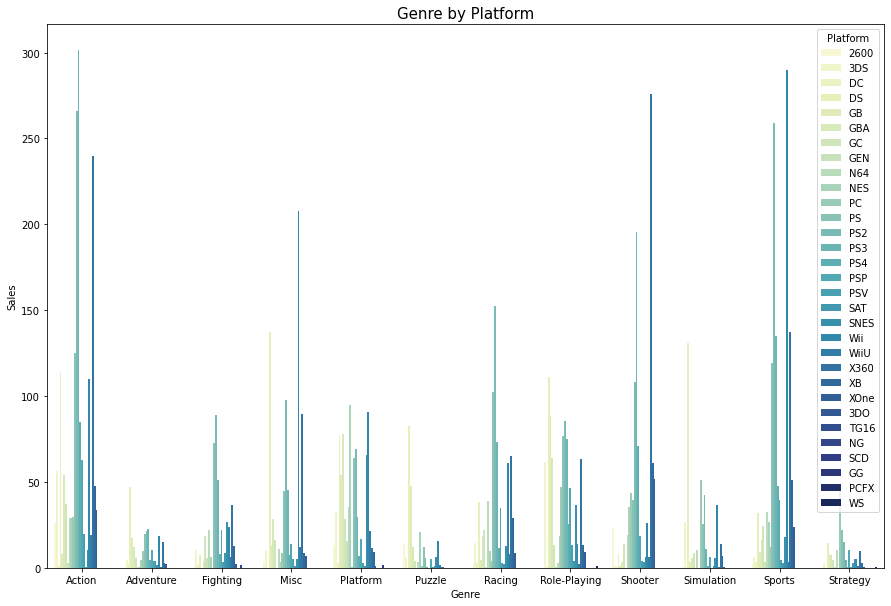

In [47]:
# 플랫폼별 장르의 출고량
platform_genre = df_one_sales.groupby(['Genre', 'Platform'])['Sales'].sum().reset_index()

plt.figure(figsize=(15,10))
plt.title('Genre by Platform', fontsize=15)
sns.barplot(data=platform_genre, x='Genre', y='Sales', hue='Platform', ci=None, palette='YlGnBu')

plt.savefig('fdd.png', dpi=500)
plt.show();

In [48]:
# action의 플랫폼별 출고량
action_sort = platform_genre[platform_genre['Genre']=='Action']
action_sort.sort_values(['Sales']).tail()

,Genre,Platform,Sales
3,Action,DS,113.49
11,Action,PS,124.96
21,Action,X360,239.60
12,Action,PS2,266.20
13,Action,PS3,301.47


In [89]:
# 10개년 action의 플랫폼별 출고량
recent_genre = recent3.groupby(['Year', 'Platform', 'Genre'])['Sales'].sum().reset_index()
recent_action = recent_genre[recent_genre['Genre']=='Action']
recent_action

,Year,Platform,Genre,Sales
0,2010,DS,Action,14.74
12,2010,PC,Action,2.14
23,2010,PS2,Action,1.35
31,2010,PS3,Action,39.74
42,2010,PSP,Action,9.02
...,...,...,...,...
552,2016,PSV,Action,1.74
558,2016,WiiU,Action,1.53
564,2016,X360,Action,0.49
567,2016,XOne,Action,2.38


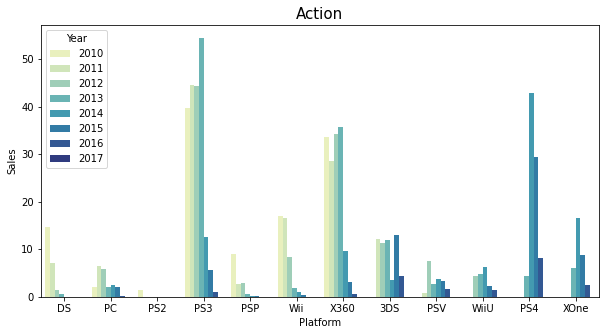

In [101]:
plt.figure(figsize=(10,5))
plt.title('Action', fontsize=15)
sns.barplot(data=recent_action, x='Platform', y='Sales', hue='Year', ci=None, palette='YlGnBu')
# plt.savefig('c.png', dpi=500)
plt.show();

In [97]:
a = recent_action.groupby(['Platform'])['Sales'].sum()
b = a.sort_values().reset_index()

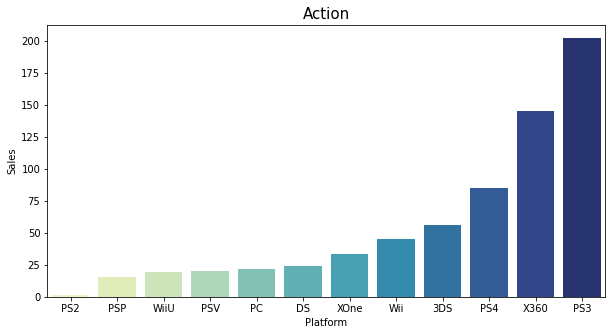

In [96]:
plt.figure(figsize=(10,5))
plt.title('Action', fontsize=15)
sns.barplot(data=b, x='Platform', y='Sales', ci=None, palette='YlGnBu')
plt.savefig('action.png', dpi=500)
plt.show();

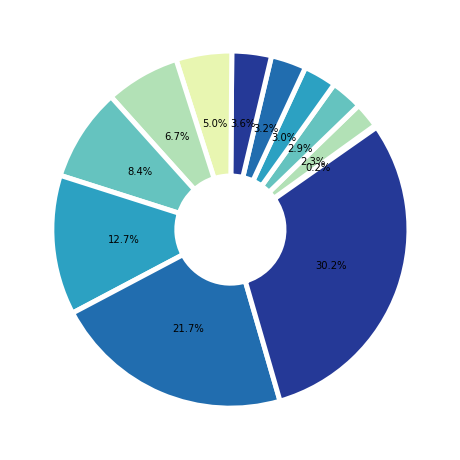

In [87]:
labels = ['NA', 'EU', 'JP', 'Other']
plt.figure(figsize=(8,9))
plt.pie(b, autopct='%.1f%%', 
       colors = sns.color_palette('YlGnBu'), startangle=35,
       wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
# plt.savefig('platform.png', dpi=500)
plt.show()

> **분석4-3. 여러 플랫폼에 출시된 게임**

In [52]:
# 여러 플랫폼에 출시된 게임
name_duplicated = df_one_sales[df_one_sales.duplicated(['Name'], keep=False)]
name_duplicated

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,year
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2000s
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,2010s
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03,2010s
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08,2010s
15,16,Mini Ninjas,PS3,2009,Action,Eidos Interactive,0.14,0.16,0.00,0.06,0.36,2000s
...,...,...,...,...,...,...,...,...,...,...,...,...
16134,16592,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53,2000s
16136,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,2000s
16138,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,2010s
16139,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,2010s


In [53]:
# 여러 플랫폼에 출시된 action 게임
Action = name_duplicated[name_duplicated['Genre']=='Action']

action1 = Action.groupby(['Name','Genre', 'Platform', 'Year'])['Sales'].sum().reset_index()
action2 = action1.sort_values(by=["Name", "Sales"], ascending=[True, False])
action2

,Name,Genre,Platform,Year,Sales
5,007: Quantum of Solace,Action,X360,2008,1.49
3,007: Quantum of Solace,Action,PS3,2008,1.17
4,007: Quantum of Solace,Action,Wii,2008,0.67
2,007: Quantum of Solace,Action,PS2,2008,0.43
0,007: Quantum of Solace,Action,DS,2008,0.13
...,...,...,...,...,...
1953,[Prototype 2],Action,X360,2012,0.80
1952,[Prototype 2],Action,PS3,2012,0.75
1951,[Prototype 2],Action,PC,2012,0.10
1955,[Prototype],Action,X360,2009,1.31


In [54]:
# (여러 플랫폼에 출시된 action 게임 중) 가장 출고량이 높은 플랫폼
action3 = action2.drop_duplicates(['Name'], keep='first')
action3

,Name,Genre,Platform,Year,Sales
5,007: Quantum of Solace,Action,X360,2008,1.49
6,007: The World is not Enough,Action,N64,2000,1.56
9,3rd Super Robot Wars Z: Tengoku-Hen,Action,PSV,2015,0.19
10,50 Cent: Bulletproof,Action,PS2,2005,1.77
13,7 Days to Die,Action,PS4,2016,0.12
...,...,...,...,...,...
1943,Yogi Bear: The Video Game,Action,DS,2010,0.14
1946,Young Justice: Legacy,Action,PS3,2013,0.09
1950,ZombiU,Action,WiiU,2012,1.02
1953,[Prototype 2],Action,X360,2012,0.80


In [55]:
# 여러 플랫폼 중 가장 출고량이 높았던 플랫폼의 게임 수
a4 = action3.groupby(['Platform'])['Sales'].size().reset_index()
a5 = a4.sort_values(['Sales'])

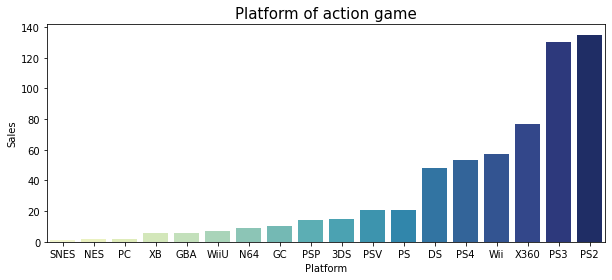

In [56]:
plt.figure(figsize=(10,4))
plt.title('Platform of action game', fontsize=15)
sns.barplot(data=a5, x='Platform', y='Sales', ci=None, palette='YlGnBu')
plt.savefig('10.png', dpi=500)
plt.show();

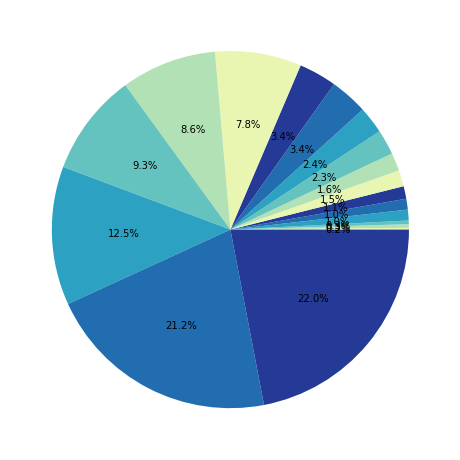

In [57]:
plt.figure(figsize=(8,9))
plt.pie(a5['Sales'], autopct='%.1f%%', 
       colors = sns.color_palette('YlGnBu'))
plt.show()

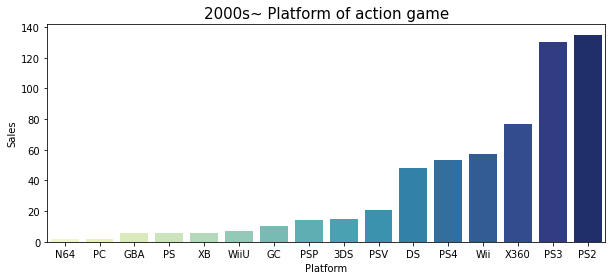

In [58]:
# 2000년~
a6 = action3[action3['Year']>=2000]
a7 = a6.groupby(['Platform'])['Sales'].size().reset_index()
a8 = a7.sort_values(['Sales'])

plt.figure(figsize=(10,4))
plt.title('2000s~ Platform of action game', fontsize=15)
sns.barplot(data=a8, x='Platform', y='Sales', ci=None, palette='YlGnBu')
plt.savefig('002.png', dpi=500)
plt.show();